导入需要的库

In [1]:
import seaborn as sns  # 用于画图
from bs4 import BeautifulSoup  # 用于爬取arxiv的数据
import re  # 用于正则表达式，匹配字符串的模式
import requests  # 用于网络连接，发送网络请求，使用域名获取对应信息
import json  # 读取数据，我们的数据为json格式的
import pandas as pd  # 数据处理，数据分析
import matplotlib.pyplot as plt  # 画图工具

⾸首先我们来统计论⽂文⻚页数，也就是在 comments 字段中抽取pages和figures和个数，⾸首先完成字段读
取。

In [2]:
data = [] #初始化
#使⽤用with语句句优势： 1.⾃自动关闭⽂文件句句柄； 2.⾃自动显示（处理理）⽂文件读取数据异常
with open("H:\\arxiv-metadata-oai-snapshot.json", 'r') as f:
    for idx, line in enumerate(f):
        d = json.loads(line)
        d = {'abstract': d['abstract'], 'categories': d['categories'],'comments': d['comments']}
        data.append(d)
data = pd.DataFrame(data) #将list变为dataframe格式，⽅方便便使⽤用pandas进⾏行行分析

In [4]:
data.head()

,abstract,categories,comments,pages
412,"We study pentaquark $\Theta^{+} (I=0,J=1/2)$...",hep-ph,"4pages, 2figures, Talk at the Yukawa Internati...",[4pages]
607,We study birational maps with empty base loc...,math.AC math.AG,22pages,[22pages]
684,In this paper we give a generalization of Ch...,math.CO,11pages,[11pages]
847,A local growth algorithm for a decagonal qua...,cond-mat.dis-nn cond-mat.stat-mech math-ph mat...,"4pages, 2figures",[4pages]
982,The electromagnetic form factors of the exot...,hep-ph,"12pages, 2 figures",[12pages]


In [5]:
data.shape

(7736, 4)

对pages进⾏行行抽取：

In [6]:
# 使⽤用正则表达式匹配， XX pages
data['pages'] = data['comments'].apply(lambda x: re.findall('[1-9][0-9]*pages', str(x)))
# 筛选出有pages的论⽂
data = data[data['pages'].apply(len) > 0]
# 由于匹配得到的是⼀一个list，如['19 pages']，需要进⾏转换
#data['pages'] = data['pages'].apply(lambda x: float(x[0].replace(' pages','')))
data.shape

(7736, 4)

In [7]:
data.head()

,abstract,categories,comments,pages
412,"We study pentaquark $\Theta^{+} (I=0,J=1/2)$...",hep-ph,"4pages, 2figures, Talk at the Yukawa Internati...",[4pages]
607,We study birational maps with empty base loc...,math.AC math.AG,22pages,[22pages]
684,In this paper we give a generalization of Ch...,math.CO,11pages,[11pages]
847,A local growth algorithm for a decagonal qua...,cond-mat.dis-nn cond-mat.stat-mech math-ph mat...,"4pages, 2figures",[4pages]
982,The electromagnetic form factors of the exot...,hep-ph,"12pages, 2 figures",[12pages]


由于匹配得到的是⼀一个list，如['19 pages']，需要进⾏行行转换

In [12]:
data['pages'] = data.loc[:,'pages'].apply(lambda x:float(str(x[0]).replace('pages','')))

In [13]:
data.head()

,abstract,categories,comments,pages
412,"We study pentaquark $\Theta^{+} (I=0,J=1/2)$...",hep-ph,"4pages, 2figures, Talk at the Yukawa Internati...",4.0
607,We study birational maps with empty base loc...,math.AC math.AG,22pages,22.0
684,In this paper we give a generalization of Ch...,math.CO,11pages,11.0
847,A local growth algorithm for a decagonal qua...,cond-mat.dis-nn cond-mat.stat-mech math-ph mat...,"4pages, 2figures",4.0
982,The electromagnetic form factors of the exot...,hep-ph,"12pages, 2 figures",12.0


对pages进⾏行行统计：

In [14]:
data['pages'].describe().astype(int)

count    7736
mean       16
std        18
min         1
25%         8
50%        13
75%        21
max       505
Name: pages, dtype: int32

统计结果如上：论⽂平均的页数为16页， 75%的论文在18页以内，最⻓的论文有505页。
接下来按照分类统计论⽂文⻚页数，选取了了论⽂文的第⼀一个类别的主要类别：

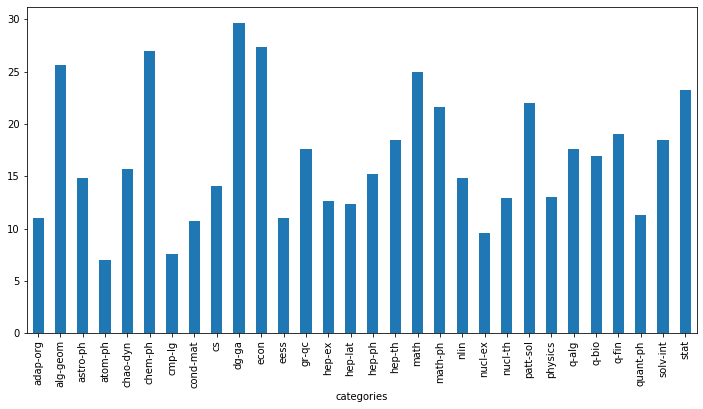

In [15]:
# 选择主要类别
data['categories'] = data['categories'].apply(lambda x: x.split(' ')[0])
data['categories'] = data['categories'].apply(lambda x: x.split('.')[0])
# 每类论⽂文的平均⻚页数
plt.figure(figsize=(12, 6))
data.groupby(['categories'])['pages'].mean().plot(kind='bar')

接下来对论⽂文图表个数进⾏行行抽取：

In [23]:
data['figures'] = data['comments'].apply(lambda x: re.findall('[1-9][0-9]*figures', str(x)))
data = data[data['figures'].apply(len) > 0]
data['figures'] = data['figures'].apply(lambda x: float(x[0].replace('figures', '')))
data.head()

,abstract,categories,comments,pages,figures
412,"We study pentaquark $\Theta^{+} (I=0,J=1/2)$...",hep-ph,"4pages, 2figures, Talk at the Yukawa Internati...",4.0,2.0
847,A local growth algorithm for a decagonal qua...,cond-mat,"4pages, 2figures",4.0,2.0
3504,We investigate the total spin in an individu...,cond-mat,"5pages, 5figures, accepted for publication in ...",5.0,5.0
3862,We theoretically study the Fano-Kondo effect...,cond-mat,"5pages,6figures",5.0,6.0
5880,We study the isospin asymmetry in the isosca...,nucl-th,"16pages,6figures",16.0,6.0


最后我们对论⽂文的代码链接进⾏行行提取，为了了简化任务我们只抽取github链接：

In [29]:
# 筛选包含github的论⽂文
data_with_code = data[(data.comments.str.contains('github')==True)|
                      (data.abstract.str.contains('github')==True)]
data_with_code['text'] = data_with_code['abstract'].fillna('') +data_with_code['comments'].fillna('')
# 使⽤用正则表达式匹配论⽂文
data_with_code.head()
pattern = '[a-zA-z]+://github[^\s]*'
data_with_code['code_flag'] =data_with_code['text'].str.findall(pattern).apply(len)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


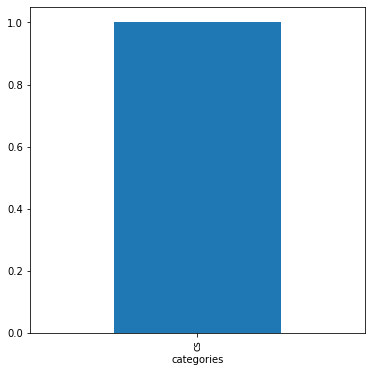

In [31]:
data_with_code = data_with_code[data_with_code['code_flag'] == 1]
plt.figure(figsize=(6, 6))
data_with_code.groupby(['categories'])['code_flag'].count().plot(kind='bar')

只有一种，原因未知。。